In [2]:
import sys
sys.path.append('../')
from probability import *
from information import *

In [3]:
%reload_ext autoreload

%autoreload 2

In [4]:
net = CNN()
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor()
)

mnist_train = torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1)

mnist_test = torch.utils.data.DataLoader(test_data,
                                         batch_size=100,
                                         shuffle=True,
                                         num_workers=1)

total_step = len(mnist_train)


In [5]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.002)    

In [6]:
'''
Гиперпараметры v4:
avg_pool2d_input = nn.MaxPool2d((4, 4))
avg_pool3d_z1 = nn.MaxPool3d((1, 7, 7))
avg_pool3d_z2 = nn.MaxPool3d((1, 7, 7))
            
z1_d = self.discrete_hidden(self.Z1, 2)
z2_d = self.discrete_hidden(self.Z2, 2)
        
'''

net.train()
num_epochs = 10
informations = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(mnist_train):
        output = net(images)[0]
        loss = loss_func(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            torch.save(net.state_dict(), f"epoch_{epoch}.pth")
    information = Information(net, mnist_train)
    information.get_X_Y()
    information.get_data_comp(net, version='v4')
    information.get_pdf()
    information.get_mi()
    information.save_inf_dict(epoch,'json_comp_v4')
    informations.append(information)


Epoch [1/10], Step [100/600], Loss: 0.1747
Epoch [1/10], Step [200/600], Loss: 0.1150
Epoch [1/10], Step [300/600], Loss: 0.0335
Epoch [1/10], Step [400/600], Loss: 0.1367
Epoch [1/10], Step [500/600], Loss: 0.0915
Epoch [1/10], Step [600/600], Loss: 0.0209


../probability.py:164: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  z3_comp = sm_z3(z3)


Epoch [2/10], Step [100/600], Loss: 0.0445
Epoch [2/10], Step [200/600], Loss: 0.0545
Epoch [2/10], Step [300/600], Loss: 0.0171
Epoch [2/10], Step [400/600], Loss: 0.0803
Epoch [2/10], Step [500/600], Loss: 0.0289
Epoch [2/10], Step [600/600], Loss: 0.0540
Epoch [3/10], Step [100/600], Loss: 0.0157
Epoch [3/10], Step [200/600], Loss: 0.0896
Epoch [3/10], Step [300/600], Loss: 0.0959
Epoch [3/10], Step [400/600], Loss: 0.0465
Epoch [3/10], Step [500/600], Loss: 0.0310
Epoch [3/10], Step [600/600], Loss: 0.0069
Epoch [4/10], Step [100/600], Loss: 0.0100
Epoch [4/10], Step [200/600], Loss: 0.0118
Epoch [4/10], Step [300/600], Loss: 0.0810
Epoch [4/10], Step [400/600], Loss: 0.0433
Epoch [4/10], Step [500/600], Loss: 0.0144
Epoch [4/10], Step [600/600], Loss: 0.0044
Epoch [5/10], Step [100/600], Loss: 0.0211
Epoch [5/10], Step [200/600], Loss: 0.0038
Epoch [5/10], Step [300/600], Loss: 0.0464
Epoch [5/10], Step [400/600], Loss: 0.0152
Epoch [5/10], Step [500/600], Loss: 0.0056
Epoch [5/10

In [1]:
import json

mi_xz1 = []
mi_yz1 = []
mi_xz2 = []
mi_yz2 = []
mi_xz3 = []
mi_yz3 = []
mi_z1 = []
mi_z2 = []
mi_z3 = []

for i in range(10):
    str_i = str(i)
    json_file_path = f'../data/json_comp_v4/{str_i}.json'
    f = open(json_file_path)
    data = json.load(f)
    mi_xz1.append(data['mi_xz1'])
    mi_yz1.append(data['mi_yz1'])
    mi_xz2.append(data['mi_xz2'])
    mi_yz2.append(data['mi_yz2'])
    mi_xz3.append(data['mi_xz3'])
    mi_yz3.append(data['mi_yz3'])
    mi_z1.append(data['h_z1'])
    mi_z2.append(data['h_z2'])
    mi_z3.append(data['h_z3'])

Text(0.5, 1.0, 'H[Z3]')

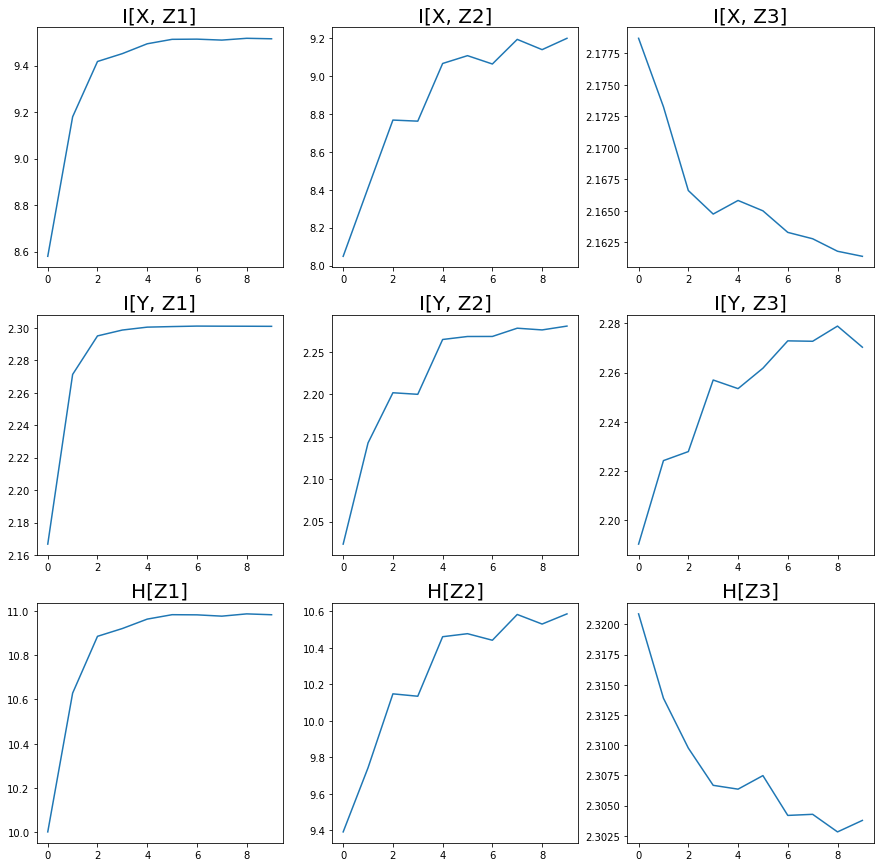

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharey=False)

axs[0][0].plot(mi_xz1)
axs[0][0].set_title('I[X, Z1]', fontsize=20)
axs[0][1].plot(mi_xz2)
axs[0][1].set_title('I[X, Z2]', fontsize=20)
axs[0][2].plot(mi_xz3)
axs[0][2].set_title('I[X, Z3]', fontsize=20)
axs[1][0].plot(mi_yz1)
axs[1][0].set_title('I[Y, Z1]', fontsize=20)
axs[1][1].plot(mi_yz2)
axs[1][1].set_title('I[Y, Z2]', fontsize=20)
axs[1][2].plot(mi_yz3)
axs[1][2].set_title('I[Y, Z3]', fontsize=20)
axs[2][0].plot(mi_z1)
axs[2][0].set_title('H[Z1]', fontsize=20)
axs[2][1].plot(mi_z2)
axs[2][1].set_title('H[Z2]', fontsize=20)
axs[2][2].plot(mi_z3)
axs[2][2].set_title('H[Z3]', fontsize=20)
